# IV. Labor - Differenciálegyenletek szimbolikus megoldása


<div style="background :Red; padding: 1%!important;" >
    
A házi feladatokat <b>fel kell tölteni és be is kell mutatni</b> a Canvas-en megjelenő határidőig.  <br>
A feltöltendő fájl neve: <code>L4_azonosító.ipynb</code>.  <br>
Elérhető maximális pontszám <code>10+2</code>. <br>
<b>A megoldáshoz egy új notebookot hozz létre!</b>

Szimbolikus megoldás [dokumentáció](https://docs.sympy.org/latest/modules/solvers/ode.html)   
Newton-féle hűlési törvény [videó](https://www.youtube.com/watch?v=PtiNT3bN1nk)  
Mozgással kapcsolatos feladatok

## 1. Bevezető

Közönséges elsőrendű explicit **differenciálegyenlet**:  

$$y'(x) = f(x,y(x)),$$

ahol $f\colon\mathbb{R}^2\to\mathbb{R}$ egy adott rögzített függvény, $y(x)$ az ismeretlen függvény, $x$ pedig a változó. 

**Közönséges**: az ismeretlen függvény egyváltozós.  
**Elsőrendű**: a megjelenő deriváltak közül a legmagasabb rend egyes.  
**Explicit**: a függvény deriváltja kifejezhető a függvény és a változója segítségével.

**Sajátos megoldás**: egy olyan $y(x)$ függvény, ami teljesíti az egyenletet.  
**Általános megoldás**: az egyenletet teljesítő összes függvény "családja".


**Példa:** $f(u,v)=2u$, vagyis $y'(x)=2x$.

Az $y'(x) = 2x$ egyenlet **általános megoldása**  
$$y = \int 2x \mathrm{d}x = x^2+C,\quad\text{ahol }C\in\mathbb{R}.$$

In [1]:
from sympy import Function, Symbol, dsolve                #ez kell a szimbolikus megoldáshoz

x = Symbol('x')
y = Function('y')
dsolve(y(x).diff(x)-2*x, y(x))                            #bal oldalra visszük a tagokat: y'(x)-2x=0

Eq(y(x), C1 + x**2)

A következő függvények mindegyike egy-egy **sajátos megoldás**, mert mindegyik teljesíti az egyenletet:  

$$y_1(x)=x^2,\quad y_2(x)=x^2+2,\quad y_3(x)=x^2+18.163.$$

**Észrevétel:** Ha az általános megoldásban a $C$ helyére egy tetszőleges konkrét számot helyettesítünk, akkor egy sajátos megoldást kapunk.

Ábrázoljuk az $y_1$, $y_2$, $y_3$ függvényeket.

In [2]:
%matplotlib widget                                                             
import matplotlib.pyplot as plt                             #plot
import numpy as np                                          #mátrixműveletek

def create_plot1():
    gen_sol = dsolve(y(x).diff(x)-2*x, y(x))                    #általános megoldás
    fig,ax = plt.subplots()
    for i,c in enumerate([0,2,18.163]):
        part_sol = gen_sol.subs("C1",c)                         #sajátos megoldás
        x_vals = np.linspace(0,2,21)                            
        y_vals = [part_sol.rhs.subs({x:xx}) for xx in x_vals]
        ax.plot(x_vals,y_vals,label="$y_{}; C={}$".format(i+1,c))  
    ax.legend();

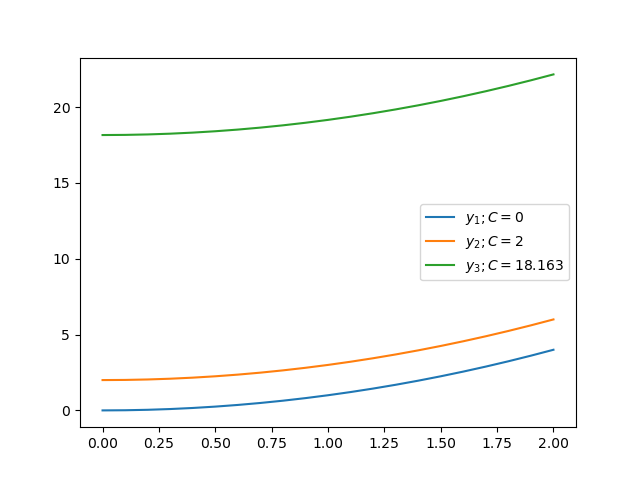

In [3]:
create_plot1()

**Cauchy feladat** (differenciálegyenlet + kezdeti feltétel):

$$\begin{cases}y'(x)=f(x,y(x))\\y(x_0)=y_0\end{cases}$$

A Cauchy-feladat **megoldása** a differenciálegyenlet egy **sajátos megoldása** lesz.

**Példa.**  $y'(x) = 2x$, $y(1)=2$.

A differenciálegyenlet általános megoldása $y(x)=x^2+C$. 

A kezdeti feltétel alapján $2=1^2+C$, ahonnan $C=1$. 

A Cauchy-feladat megoldása tehát $y(x)=x^2+1$.

In [8]:
dsolve(y(x).diff(x)-2*x, y(x),ics={y(1):2})             #ics (initial conditions): kezdeti feltételek

Eq(y(x), x**2 + 1)

<h3 style="background :Red; padding: 1%!important;"> 1. Házi feladat. (2 pont)</h3>

Határozd meg az $y'(x) = x\cdot y(x)$, $y(0)=y_0$ Cauchy feladat megoldását minden $y_0\in\{-1,-0.8,\dots,0.8,1\}$ értékre, majd ábrázold a kapott megoldásokat! 

A következőhöz hasonló ábrát kell kapj:  
![img]( 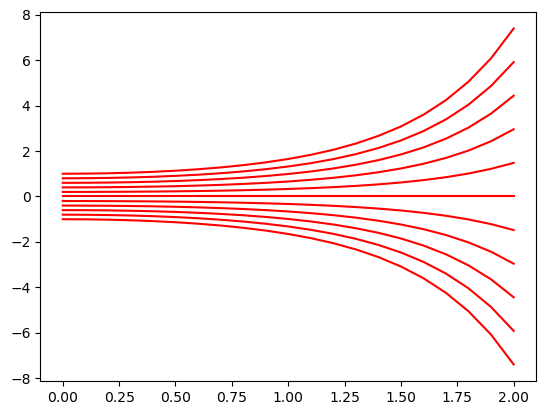)

## 2. A Newton-féle hűlési törvény

Egy testet elhelyezünk egy állandó hőmérsékletű helységbe és vizsgáljuk a test hőmérsékletét az idő függvényében.

**Törvény:** A test hőmérséklet változásának sebessége arányos a test hőmérséklete, illetve a helység hőmérséklete közötti különbséggel.

Legyen $y(t)$ a test hőmérséklete a $t$. időpillanatban, $y_k$ a helység hőmérséklete. Ekkor
$$y'(t)=-r(y(t)-y_k).$$

A kapcsolódó feladatokban megoldjuk az egyenletet, a megadott adatok alapján pedig meghatározzuk az ismeretlen paramétereket. [videó](https://www.youtube.com/watch?v=PtiNT3bN1nk)

<h3 style="background :Red; padding: 1%!important;"> 2. Házi feladat. (2 pont)</h3>

Egy $37^\circ\text{C}$-os krumplit elhelyezünk egy $12^\circ\text{C}$-os állandó hőmérsékletű pincébe. Tudva, hogy egy óra elteltével a krumpli $30^\circ\text{C}$-os, ábrázold a krumpli hőmérsékletét az idő függvényében az első 10 órában.

**A megoldásban csak a megadott differenciálegyenlet, a feladat adatai és Python egyenlet megoldói használhatóak, papíron számolt megoldások, vagy levezetett képletek nem.**

<h3 style="background :Red; padding: 1%!important;"> 3. Házi feladat. (2 pont)</h3> 

Egy $12^\circ\text{C}$-os állandó hőmérsékletű pincében déli 12:00-kor találtak egy $27^\circ\text{C}$-os holttestet. A holttest megtalálás után egy órával szintén megmérjük annak hőmérsékletét, ekkor az $22^\circ\text{C}$. Tudva, hogy a halál beálltakor a testhőmérséklet $37^\circ\text{C}$, határozd meg a halál beálltának pillanatát (óra, perc, másodperc). Ábrázold a test hőmérsékletét az idő függvényében a halál beálltának pillanatától a második mérésig.  
A kapott görbén tüntesd fel a két mérésnek megfelelő pontokat. 

**A megoldásban csak a megadott differenciálegyenlet, a feladat adatai és Python egyenlet megoldói használhatóak, papíron számolt megoldások, vagy levezetett képletek nem.**

## 3. Mozgással kapcsolatos feladatok

Tételezzük fel, hogy a mozgás $x$ irányban történik egy egyenes mentén.

- **Pozíció:** $\quad$ $x(t)$ – megadja, hogy melyik időpillanatban hol van a vizsgált test.

- *Átlagsebesség:* $\quad$ $\displaystyle\overline{v_x}=\frac{\Delta x}{\Delta t}=\frac{\text{megtett út}}{\text{idő}}$.  

- **Sebesség:** $\quad$ $\displaystyle v_x(t)=\lim_{\Delta t\to0}\frac{\Delta x}{\Delta t}=\lim_{\Delta t\to 0}\frac{x(t+\Delta t)-x(t)}{\Delta t}=x'(t)$.

- **Gyorsulás:** $\quad$ $a_x(t)=v_x'(t)=x''(t)$.

Tetszőleges háromdimenziós mozgás esetén:

$\quad\bullet$ a pozíció:   $\vec{r}(t)=(x(t),y(t),z(t))$;  
$\quad\bullet$ a sebesség: $\vec{v}(t)=(v_x(t),v_y(t),v_z(t))=(x'(t),y'(t),z'(t))$;  
$\quad\bullet$ a gyorsulás: $\vec{a}(t)=(a_x(t),a_y(t),a_z(t))=(x''(t),y''(t),z''(t))$.

**Newton második törvénye:** $\quad$ $F=m\cdot a,$

vagyis *erő* $=$ *tömeg* $\times$ *gyorsulás*. 

Ez igazából egy **másodrendű** differenciálegyenlet: $F=m\cdot x''.$

Ha ismerjük  
az $x(0)=x_0$ kezdőpozíciót,  
az $x'(0)=v_{x_0}$ kezdősebességet,  
akkor megoldva a kapott Cauchy-feladatot megadhatjuk a test mozgását.

### 3.1. Szabadesés

Egy $m$ tömegű testet $H$ magasságból szabadon engedünk.  
Határozzuk meg a test mozgását! (A közegellenállástól eltekintünk.)

**Megoldás.** Jelölje $y(t)$ a test magasságát az idő függvényében. A testre csak a **gravitációs erő** hat:

$G=-m\cdot g,\quad$ ahol $g=9{,}81\text{m}/\text{s}^2$ a *gravitációs gyorsulás.*  Az erő "lefele" hat, ezért a mínusz.

Newton második törvénye alapján
$-m\cdot g = m\cdot y''(t),$
vagyis $y''(t)=-g.$ 

A feladat szövege alapján $y(0)=H$.    
Mivel szabadesésről van szó ezért $y'(0)=0$.

**Észrevétel:** A mozgás nem függ a tömegtől.


A kapott Cauchy-feladat tehát
$$\begin{cases}y''(t)=-g\\y(0)=H\\y'(0)=0\end{cases},$$
aminek a megoldása a következő.

In [3]:
y = Function('y')
t = Symbol('t')
g = Symbol('g')
H = Symbol('H')
dsolve(y(t).diff(t,2)+g,ics={y(0): H, y(t).diff(t).subs(t,0): 0})

Eq(y(t), H - g*t**2/2)

<h3 style="background :Red; padding: 1%!important;"> 4. Házi feladat. (2 pont)</h3>

    
Szabadon engedünk $H=10m$ magasságból egy testet. 

$\quad$ a) Határozd meg és írasd ki az $y(t)$ függvényt, vagyis a test magasságát az idő függvényében!   

$\quad$ b) Határozd meg azt a $t_\text{max}$ időpillanatot, amikor a test földet ér!  

$\quad$ c) Ábrázold a test magasságát az idő függvényében a $[0,t_\text{max}]$ intervallumon!

A közegellenállástól eltekintünk és legyen $g=9{,}81 m/s^2$.

**A megoldásban csak a megadott differenciálegyenlet, a feladat adatai és Python egyenlet megoldói használhatóak, papíron számolt megoldások, vagy levezetett képletek nem.**

### 3.2. Ferde hajítás

Egy $m$ tömegű testet, az $(x_0,y_0)$ kezdőpozícióból $v_0$ sebességgel $\alpha$ szög alatt elhajítunk.  
Határozzuk meg a test mozgását.  (A közegellenállástól eltekintünk.)

In [4]:
from matplotlib.patches import Arc

def create_plot2():
    center = np.array([0.3,0.3])
    radius = 0.05
    alpha = np.pi/6
    vec = 0.6*np.array([np.cos(alpha),np.sin(alpha)])    
    fig,ax = plt.subplots()
    ax.set_aspect("equal")
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.add_patch(plt.Circle(center,radius,color="r"))
    ax.arrow(center[0],center[1],vec[0],vec[1],length_includes_head=True,head_width=0.02,color="black")
    ax.arrow(center[0],center[1],vec[0],0,length_includes_head=True,head_width=0.02,color="gray")
    ax.arrow(center[0],center[1],0,vec[1],length_includes_head=True,head_width=0.02,color="gray")
    ax.plot([center[0]+vec[0],center[0]+vec[0]],[center[1],center[1]+vec[1]],color='gray',linestyle="dashed")
    ax.plot([center[0],center[0]+vec[0]],[center[1]+vec[1],center[1]+vec[1]],color='gray',linestyle="dashed")
    ax.text(center[0]+vec[0]/2,center[1]-0.05,"${v_0}_x$")
    ax.text(center[0]-0.07,center[1]+vec[1]/2,"${v_0}_y$")
    ax.text(center[0]+vec[0]/2,center[1]+vec[1]/2+0.04,"$v_0$")
    ax.add_patch(Arc(center,0.3,0.3,0,0,alpha*180/np.pi))
    ax.text(center[0]+0.17*np.cos(alpha/2),center[1]+0.17*np.sin(alpha/2),"$\\alpha$")
    ax.plot([center[0],center[0]],[center[1],0],color='gray',linestyle="dashed",linewidth=1)
    ax.plot([center[0],0],[center[1],center[1]],color='gray',linestyle="dashed",linewidth=1)
    ax.text(-0.06,center[1],"$y_0$",color="red")
    ax.text(center[0]-0.02,-0.05,"$x_0$",color="red");

C:\Users\norbi\AppData\Local\Temp\ipykernel_3320\420529360.py:21: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Arc(center,0.3,0.3,0,0,alpha*180/np.pi))


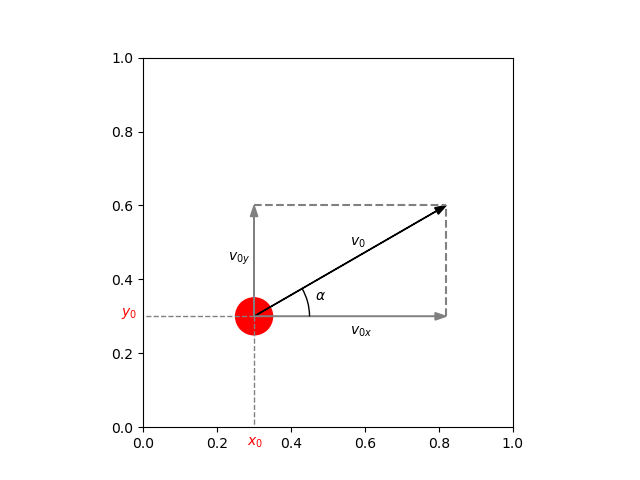

In [5]:
create_plot2()

A kapott Cauchy-feladatok: $$\begin{cases}x''(t)=0,\\x(0)=x_0,\\x'(0)=v_0\cos(\alpha),\end{cases}\qquad\text{és}\qquad\begin{cases}y''(t)=-g,\\y(0)=y_0,\\y'(0)=v_0\sin(\alpha).\end{cases}$$

<h3 style="background :Red; padding: 1%!important;"> 5. Házi feladat. (+2 pont)</h3>

    
A $(0,20)$ koordinátájú pontból $v_0=5\text{ m}/\text{s}$ kezdősebességgel $\alpha=30^\circ$-os szög alatt eldobunk egy testet.

$\quad$ a) Határozd meg és írasd ki az $x(t)$ és $y(t)$ függvényeket!   

$\quad$ b) Határozd meg azt a $t_\text{max}$ időpillanatot, amikor a test földet ér!  

$\quad$ c) Ábrázold a test $(x(t),y(t))$ pályáját $[0,t_\text{max}]$ intervallumon!

A közegellenállástól eltekintünk és legyen $g=9{,}81 m/s^2$.

**A megoldásban csak a megadott differenciálegyenlet, a feladat adatai és Python egyenlet megoldói használhatóak, papíron számolt megoldások, vagy levezetett képletek nem.**

## 3.3. Rugóra illesztett test

Egy vízszintes asztallapon egy $k$ rugóállandójú rugó egyik végét rögzítjük, a másik végére ráerősítünk egy $m$ tömegű testet. A testet kimozdítjuk, majd elengedjük.  
Határozzuk meg a test mozgását!  (Az asztallap és a test közötti súrlódástól eltekintünk.)

**Megoldás.** Az asztallap részéről ható *tartóerő* kiegyensúlyozza a testre ható *gravitációs erőt*, emiatt csak vízszintes mozgás van.

Jelölje $x(t)$ a test pozícióját a nyugalmi helyzethez viszonyítva ($x=0$, ha a rugó nincs megnyújtva).  
Legyen $x(0)=x_0$, a feladat szövege alapján $x'(0)=0$.

A testre vízszintes irányban csak a **rugalmassági erő** hat:  
$F_r=-k\cdot x,\quad$ ahol $k$ a rugóálladó.

A kapott Cauchy-feladat:
$$\begin{cases}m\cdot x''(t)=-k\cdot x(t),\\x(0)=x_0,\\x'(0)=0.\end{cases}$$


<h3 style="background :Red; padding: 1%!important;"> 6. Házi feladat. (2 pont)</h3>

Egy vízszintes asztallapon egy $k=1N/m$ rugóállandójú rugó egyik végét rögzítjük, a másik végére ráerősítünk egy $m=1 kg$ tömegű testet. A testet kimozdítjuk $x_0=0{,}5$ méterrel, majd elengedjük.

$\quad$ a) Határozd meg és írasd ki az $x(t)$ függvényt!   

$\quad$ b) Határozd meg azt a $t_2$ időpillanatot, amikor a test másodszor kerül az $x=0$ pozícióba!  

$\quad$ c) Ábrázold az  $x(t)$ függvényt a $[0,t_2]$ intervallumon!

Az asztallap és a test közötti súrlódástól eltekintünk.

**A megoldásban csak a megadott differenciálegyenlet, a feladat adatai és Python egyenlet megoldói használhatóak, papíron számolt megoldások, vagy levezetett képletek nem.**
